### **Tries de sufijos**

Presentaremos algunas notas e implementaciones de Tries de Sufijos. Trabajaremos directamente con los llamados "tries comprimidos". Lo que describimos en estas notas se conoce a menudo como *trie de sufijos generalizado*.

Esta presentación será algo esquemática. Aunque las ideas son muy intuitivas, el *diablo* (como dicen) está en los *detalles*. Los detalles son difíciles de describir por completo y la lectura del código te dará una gran idea. Utilizamos esta presentación de dos fuentes:

- El excelente libro de Dan Gusfield titulado <i>Algorithms on Strings, Trees and Sequences</i>. 
- El capítulo sobre tries de sufijos disponible en el <i>Handbook of Data-Structures</i> de Dinesh P. Mehta y Sartaj Sahni (esta es una presentación mucho más breve e incluye también una estructura de datos relacionada llamada arreglos de sufijos).

Un trie de sufijos es una *estructura de datos trie* cuyo conjunto de cadenas corresponde a todos los sufijos de una cadena dada. Como ejemplo, consideremos la cadena _mamamia\$_, donde "\$" representa el carácter de terminación especial que sólo aparece al final de la cadena.

* Los sufijos son { _mamamia\$_, _amamamia\$_, _amamia\$_, _mamia\$_, _amia\$_, _mia\$_, _ia\$_, _a\$_, _\$_ }

El trie de sufijos (generalizado) para la cadena "mamamia\$" se muestra a continuación: 

<img src="mamamia-suffix-trie.png" width="80%"></img>

Por el momento ignora las aristas punteadas rojas (se llaman enlaces de sufijo y se describirán más adelante).

* Los nodos internos se muestran en azul y las hojas en verde.

Cada camino desde la raíz hasta una hoja corresponde a un sufijo de la cadena (ver el conjunto más arriba) y cada sufijo pertenece con precisión a un único camino.

* Cada hoja está etiquetada "l\<i>s\<j>" para dos números $i, j$, donde $i$ denota el ID y $j$ denota la posición inicial del sufijo que representa la hoja.

Observa que las aristas están "comprimidas": cada arista está etiquetada por una subcadena de la cadena original en lugar de por un solo carácter (como en un trie regular). Además, para cada nodo interno, no hay dos aristas salientes que representen cadenas que comiencen con el mismo carácter.

Por lo tanto, para cualquier cadena, existe o bien un camino único en el trie de sufijos que parte de la raíz, o no existe ningún camino. Volviendo al ejemplo "mamamia$":

* La cadena "amia" recorre el camino
  $n0 \rightarrow n10 \rightarrow n5 \rightarrow ((\text{dos caracteres de desplazamiento en la arista de } n5 \text{ a } l6))$
* En cambio, no hay ningún camino que corresponda a la cadena "anana" en el trie de sufijos.

La propiedad clave de un trie de sufijos es la siguiente:

<div class="alert alert-block" style="background-color:lightcyan; border-color: black white black white; border-style:dashed">
    Todo camino de la raíz a una hoja corresponde a un sufijo único de la cadena, y cada sufijo corresponde a un camino único de la raíz a una hoja.
</div>

Observa que cada nodo $n$ en el trie de sufijos tiene un camino único desde la raíz hasta él, y por lo tanto tiene una cadena única $s(n)$ que nos lleva desde la raíz hasta ese nodo. Nota que $s(n)$ es vacía si $n$ es el nodo raíz.

Para el trie de sufijos en el ejemplo `mamamia$` anterior, tenemos los siguientes valores de $s(n)$ para varios nodos $n$:

$$
\begin{array}{rl}
\hline
n & s(n) \\ 
\hline 
n_0 & \text{<vacío>} \\ 
n_7 & m \\ 
n_{10} & a \\ 
n_3 & mam \\ 
n_5 & am \\ 
\hline
\end{array}
$$

### Enlaces de sufijo

Los enlaces de sufijo son un atajo útil entre nodos en el árbol. Sea $n$ un nodo interno donde $s(n) = c \alpha$, siendo $c$ un carácter y $\alpha$ una subcadena.

El enlace de sufijo es una arista de la forma
$n \rightarrow m$

tal que $s(m) = \alpha$.

Por convención, fijaremos el enlace de sufijo de la raíz apuntando a sí misma.

En el trie de sufijos del ejemplo "mamamia$" anterior, los enlaces de sufijo se muestran como líneas punteadas rojas.

La pregunta clave es: ¿por qué un enlace de sufijo para un nodo necesita apuntar a otro nodo? ¿No podría apuntar a algún punto intermedio de la cadena que etiqueta una arista?

<div class="alert alert-block" style="background-color:lightcyan">
Sea $n$ un nodo interno tal que $s(n) = c \alpha$. Debe existir un nodo interno $m$ en el trie de sufijos tal que $s(m) = \alpha$.
</div>

**Prueba:** Observa que debe existir un camino en el árbol que corresponda a \$\alpha\$. Solo necesitamos demostrar que dicho camino no puede terminar en una hoja ni en medio de una arista.
En primer lugar, dado que $n$ es un nodo interno de un trie de sufijos comprimido, existen al menos dos sufijos en la cadena original de la forma $c \alpha \beta_1$ y $c \alpha \beta_2$ para subcadenas no vacías $\beta_1, \beta_2$. Por tanto, existen al menos dos sufijos $\alpha \beta_1$ y $\alpha \beta_2$, donde $\beta_1, \beta_2$ difieren en su primera posición. De ahí que el camino que parte de la raíz correspondiente a $\alpha$ no pueda terminar en una hoja, pues deben existir caminos para $\alpha \beta\_1$ y $\alpha \beta_2$. Tampoco puede terminar en medio de una arista por la misma razón: $\beta_1, \beta_2$ difieren en la primera posición.

### Implementación

Representaremos la raíz y los nodos internos usando la clase `SuffixTrieNode` que sigue.
Almacena los siguientes campos:

* `orig_str`: la cadena original.
* `outgoing_edges`: un diccionario que mapea caracteres a la arista saliente que comienza con ese carácter.
* `suffix_link`: el enlace de sufijo del nodo, si existe.
* `depth`: el número de caracteres en la cadena única que lleva desde la raíz hasta el nodo.
* `id`: un número/ID único para el nodo. Reservamos el id `0` para la raíz.
* `parent`: un puntero al padre del nodo. Esto se establece en `None` para la raíz.


In [ ]:
class SuffixTrieNode:
    
    def __init__(self, node_id, orig_str):
        self.orig_str = orig_str # una referencia a la cadena completa
        self.outgoing_edges = {} # diccionario de caracteres a aristas
        self.suffix_link = None  # enlace de sufijo: inicialmente se establece como None
        self.id = node_id # Nota: id == 0 se toma como raíz por ahora.
        self.depth = 0 # profundidad automáticamente establecida cuando se asigna el padre
        self.parent = None # puntero al nodo padre
        
    def is_root(self):
        return self.id == 0
        
    def get_edge(self, char):
        if char in self.outgoing_edges:
            return self.outgoing_edges[char]
        else:
            return None
        
    def is_leaf(self):
        return False
    
    def add_suffix_link(self, node):
        self.suffix_link = node
        
    def add_outgoing_edge(self, new_edge):
        edge_init_char = new_edge.get_char_at(0)
        # asegura de que no existe ya una arista con el carácter inicial
        assert edge_init_char not in self.outgoing_edges, f"El char {edge_init_char} ya tiene una lista saliente para id del nodo:{self.id}"
        # asegura  de que el nodo origen de la nueva arista coincide con self
        assert new_edge.src.id == self.id, f"El nodo src en la arista saliente id:{new_edge.src.id} no coincide con el id del nodo {self.id}"
        # añade la nueva arista al diccionario usando el carácter inicial como clave
        self.outgoing_edges[edge_init_char] = new_edge
        # añade un puntero al padre desde el destino hacia el origen de la nueva arista
        new_edge.dest.parent = new_edge.src # establece el puntero al padre en el destino de la nueva arista
        if not new_edge.is_leaf_edge(): # establece la profundidad del nodo destino para esta arista
            new_edge.dest.depth = self.depth + new_edge.length()
       
    def find_edge_corresponding_to_child(self, child_node):
        # busca entre las aristas salientes para ver si hay una cuyo destino sea el nodo hijo
        for (_, edge) in self.outgoing_edges.items():
            if edge.dest.id == child_node.id:
                return edge
        return None # no se encontró dicha arista


Usaremos la estructura `SuffixTrieLeaf` para representar las hojas del trie de sufijos.
Las hojas tendrán un campo `suffix_start_pos` que nos indica en qué posición de la cadena original comienza el sufijo correspondiente al camino desde la raíz hasta la hoja.

Volviendo al ejemplo del trie de sufijos mostrado más arriba para "mamamia\$", hemos etiquetado cada hoja (en verde) como `l<id>s<suffix_start_pos>`, lo que nos da la posición inicial del sufijo que corresponde a dicha hoja.


In [ ]:
class SuffixTrieLeaf:
    def __init__(self, node_id, orig_str, suffix_start_pos):
        self.orig_str = orig_str               # la cadena original
        self.id = node_id                      # el identificador de este nodo
        assert 0 <= suffix_start_pos < len(orig_str), "Posición de sufijo fuera de rango"
        self.suffix_start_pos = suffix_start_pos  # posición inicial del sufijo en la cadena original
        self.parent = None                     # puntero al nodo padre, inicialmente None
        
    def is_leaf(self):
        return True  # indica que este nodo es una hoja


La estructura `SuffixTrieEdge` representa una arista. Una arista va desde el nodo `src` hasta el nodo `dest`, que puede ser un nodo interno o una hoja.

Además, la arista tiene dos enteros `lo` y `hi` que hacen referencia a posiciones en la cadena. La arista se interpreta como la subcadena que va desde la posición `lo` hasta la posición `hi`, inclusive. Ten en cuenta que `hi = -1` representa el final de la cadena.


In [ ]:
class SuffixTrieEdge:
    
    def __init__(self, orig_str, src_node, dest_node, lo, hi):
        assert 0 <= lo < len(orig_str) # lo debe ser una posición válida en la cadena original
        # si el nodo destino es una hoja entonces hi == -1, de lo contrario hi != -1
        if dest_node.is_leaf():
            assert hi == -1 
        else:
            assert lo <= hi <= len(orig_str)
        assert not src_node.is_leaf() # el nodo origen no puede ser una hoja
        # la arista representa str[lo]...str[hi] inclusive si hi != -1
        # o str[lo] ... str[fin]
        self.orig_str = orig_str # asigna el campo orig_str
        self.lo = lo # asigna lo/hi
        self.hi = hi 
        self.src = src_node # asigna src/dest
        self.dest = dest_node
        
    def is_leaf_edge(self):
        return self.hi == -1
    
    def length(self):
        if self.hi == -1:
            return -1
        else:
            return self.hi - self.lo + 1
    
    def get_char_at(self, offs):
        assert self.hi == -1 or offs + self.lo <= self.hi
        return self.orig_str[self.lo + offs]
    
    
    def get_sub_str(self, end=-1):
        if self.hi == -1:
            return self.orig_str[self.lo:end] if (end != -1) else self.orig_str[self.lo:]
        else:
            return self.orig_str[self.lo:self.hi+1]
        
        
    def reset_hi_and_dest(self, new_dest, new_hi):
        assert new_hi >= self.lo, f"No se puede reemplazar hi por {new_hi}"
        assert not new_dest.is_leaf(), "No se puede reemplazar el destino por un nodo hoja"
        self.hi = new_hi
        new_dest.parent = self.src
        new_dest.depth = self.src.depth + self.length()
        self.dest = new_dest


Como ayuda, definiremos una estructura llamada `TrieAddress` para referirnos a ubicaciones dentro de un trie de sufijos. Una dirección de trie puede ser de dos tipos:

* Un nodo (que puede ser la raíz o un nodo interno) del trie, o
* Una tupla `(nodo, arista, desplazamiento)` que consiste en:

  * El `nodo` interno o raíz
  * Una `arista` que debe ser una de las salientes desde ese `nodo`
  * Un `desplazamiento` que debe estar entre 1 y (longitud de la arista − 1)

Una dirección permite apuntar a una ubicación en el trie que puede estar en un nodo o en algún punto "intermedio" de una arista.

Por ejemplo, `TrieAddress(n7, n7 → n3, 1)` se refiere a un puntero que señala justo después del carácter `a` en la arista etiquetada `am` que va de `n7` a `n3`.

Del mismo modo, `TrieAddress(n7, None, 0)` apunta al nodo interno `n7`. Si el trie de sufijos fuera en realidad un "trie completo" donde cada arista estuviera etiquetada por un solo carácter (en lugar de un trie comprimido, donde cada arista puede llevar una subcadena arbitraria), una dirección de trie simplemente señalaría a un nodo de ese trie completo.

La clase `TrieAddress` implementa tres métodos auxiliares críticos:

1. **`address.traverse_next(c)`**:
   Dada una dirección `address` y encontrarse a continuación con el carácter `c`, encuentra la siguiente dirección correspondiente a avanzar sobre `c`.

2. **`address.compute_suffix()`**:
   Cada dirección corresponde a una subcadena única que nos lleva desde la raíz hasta esa dirección. Supongamos que esa cadena es de la forma \$c\alpha\$; `compute_suffix` busca la dirección que corresponde a la subcadena \$\alpha\$ (es decir, "quitar" el primer carácter).

3. **`address.create_new_edge_at(i)`**:

   * Si `address` apunta a un nodo interno, crea una nueva arista cuyo destino es una hoja nueva que representa el sufijo que empieza en la posición `i` de la cadena original.
   * Si `address` apunta en medio de una arista, "parte" esa arista en dos y crea la arista interna y la hoja correspondientes al nuevo sufijo.

Todas estas rutinas son algo complejas porque deben manejar distintos casos; los comentarios en el código te ayudarán a seguir la lógica. Se proporcionan ejemplos de cada rutina basados en el ejemplo en curso de "mamamia\$".


In [ ]:
class TrieAddress:
    
    def __init__(self,  node, edge=None, offs=0):
        assert 0 <= offs 
        self.node = node # establece el nodo
        self.edge = edge # establece la arista
        self.offs = offs # establece el desplazamiento (offset)
        if self.edge != None:
            assert self.offs > 0
        else:
            assert self.offs == 0
    
    def traverse_next(self, c):
        """Función traverse_next: encuentra la siguiente dirección (si existe)
           al encontrar el carácter c. Devuelve la nueva dirección si existe, 
           o None en caso contrario."""
        if self.edge == None: # ¿La dirección apunta a un nodo interno?
            # Sí: la dirección es solo un puntero a un nodo interno/raíz.
            # comprobar si el nodo tiene una arista de salida correspondiente a 'c'
            new_edge = self.node.get_edge(c) # intentar obtener una arista para el carácter `c`
            if new_edge == None:
                return None # no existe tal arista, entonces devolver None
            else: # new_edge != None
                assert new_edge.get_char_at(0) == c # se obtuvo una arista, comprobar que es la correcta
                if new_edge.is_leaf_edge() or new_edge.length() > 1: # si la arista es hoja o tiene longitud mayor a 1
                    return TrieAddress( self.node, new_edge,  1 ) # devuelve la dirección con desplazamiento 1 dentro de la nueva arista
                else:
                    new_node = new_edge.dest # la arista no es hoja y debe tener longitud uno
                    return TrieAddress( new_node, None, 0) # la dirección ahora es el nodo destino
        else: # self.edge != None
            # No: la dirección apunta offs posiciones más allá de self.node a lo largo de self.edge
            edge = self.edge 
            if edge.lo + self.offs < len(edge.orig_str) and edge.get_char_at(self.offs) == c: # si el siguiente carácter es `c`
                if edge.is_leaf_edge() or self.offs < edge.length() -1 : # si la arista es hoja o hay más caracteres
                    return TrieAddress(self.node, self.edge, self.offs+1) # devuelve una nueva dirección con offset incrementado
                else:
                    dest_node = edge.dest # llegamos al nodo destino
                    return TrieAddress( dest_node, None, 0) # devuelve la dirección al nodo destino
            else: # el siguiente carácter no es `c`
                return None # no hay dirección siguiente
            
    def compute_suffix(self, debug=False):
        # para calcular el sufijo, seguir el enlace de sufijo desde el nodo fuente
        #                      para llegar a un nuevo nodo fuente
        #                     luego, obtener la arista apropiada
        #                     finalmente, avanzar una distancia de offs en la arista
        node = self.node # desempaquetar
        edge = self.edge 
        offs = self.offs 
        if node.id == 0 and offs <= 1: # Si estamos en la raíz, el sufijo es el mismo
                return TrieAddress(node, None, 0) # mantiene el mismo sufijo
        if node.id == 0: # si estamos en la raíz, el nodo sufijo es la raíz
            s_node = node
        else:
            s_node = node.suffix_link # de lo contrario, seguir el enlace de sufijo
            assert s_node != None # asegura que el enlace de sufijo existe
        
        if edge == None: # si la dirección apunta directamente a un nodo
            return TrieAddress(s_node, None, offs) # el sufijo apunta al nodo de sufijo
        
        if node.id == 0: # ¿estamos en la raíz?
            c = edge.get_char_at(1) # obtiene el carácter en posición 1 de la arista
            s_edge = node.get_edge(c) # obtiene la arista de salida correspondiente a c
            assert s_edge != None, f"No hay arista para el carácter {c} en el nodo {node.id}"
            offs = offs - 1 # el sufijo es offs - 1 a lo largo de s_edge
            fwd = 1 # indica que se avanzó un paso
            if debug:
                print(f"Debug: Buscando {offs} tras {s_edge.src.id, s_edge.dest.id}")
        else:
            c = edge.get_char_at(0) # obtiene el primer carácter de la arista
            s_edge = s_node.get_edge(c) # obtiene la arista correspondiente en el nodo de sufijo
            fwd = 0
            assert s_edge != None, f"No hay arista para el carácter {c} en el nodo {s_node.id}"
            if debug:
                print(f"Debug: Buscando {offs} tras {s_edge.src.id, s_edge.dest.id}")

        assert s_edge != None # asegura que existe la arista
        # ahora se debe encontrar la posición offs desde s_node a lo largo de s_edge
        if s_edge.is_leaf_edge() or offs < s_edge.length(): 
            # si la arista es hoja o el offset es menor que su longitud
            return TrieAddress(s_node, s_edge, offs) # encontramos la dirección deseada en s_edge
        else:
            new_offs = offs # de lo contrario, recorrer offset desde s_node
            # puede que se necesite cruzar múltiples nodos/aristas
            while (not s_edge.is_leaf_edge()) and new_offs >= s_edge.length():
                new_offs = new_offs - s_edge.length() # avanzar una arista
                fwd = fwd + s_edge.length()
                s_node = s_edge.dest # moverse al nodo destino
                if new_offs > 0:
                    c = edge.get_char_at(fwd) # obtiene siguiente carácter
                    s_edge = s_node.get_edge(c)
                    assert s_edge != None
                else:
                    break
            if new_offs > 0:
                return TrieAddress(s_node, s_edge, new_offs)
            else:
                return TrieAddress(s_node, None, 0)

    def create_new_edge_at(self, orig_str, i, node_id):
        """Crear una nueva arista hoja en el trie de sufijos 
           insertando el carácter orig_str[i]."""
        assert i >= 0 and i < len(orig_str) # i debe ser un índice válido
        c = orig_str[i]  # obtiene el carácter
        node = self.node # desempaqueta
        edge = self.edge 
        offs = self.offs
        if edge == None: # si la dirección apunta a un nodo interno
            assert offs == 0
            assert node.get_edge(orig_str[i]) == None, f"El nodo {node.id} ya tiene una arista de salida para {orig_str[i]}"
            new_leaf = SuffixTrieLeaf(node_id, orig_str, i - node.depth) # crea un nuevo nodo hoja destino
            new_edge = SuffixTrieEdge(orig_str, node, new_leaf, i, -1) # crea una arista hoja
            node.add_outgoing_edge(new_edge) # agrega  al nodo actual
            return (node, new_leaf, False) # devuelve nodo de inserción, hoja nueva y que no se creó nodo interno
        else:
            assert edge.get_char_at(offs) != c, f'{edge.get_char_at(offs)}, {c}' # si el siguiente carácter es c, esta función no debería llamarse
            # dividir la arista en dos
            node1 = SuffixTrieNode(node_id, orig_str) # crea nuevo nodo
            src_node = edge.src 
            dest_node = edge.dest 
            lo = edge.lo
            hi = edge.hi
            # modifica arista actual para que node1 sea destino y ajustar hi
            edge.reset_hi_and_dest(node1, lo+offs-1)
            # crea dos nuevas aristas
            # primera: parte restante de la arista dividida
            new_edge_1 = SuffixTrieEdge(orig_str, node1, dest_node, lo+offs, hi)
            node1.add_outgoing_edge(new_edge_1)
            suffix_start_pos = i - node1.depth
            # crea nueva hoja
            new_leaf = SuffixTrieLeaf(node_id+1, orig_str, suffix_start_pos)
            # crea nueva arista hoja
            new_edge_2 = SuffixTrieEdge(orig_str, node1, new_leaf, i, -1)
            node1.add_outgoing_edge(new_edge_2)
            return (node1, new_leaf, True) # devuelve el nodo interno nuevo, hoja nueva, True indica que se creó un nodo interno
            
    def is_at_root(self):
        return self.node.id == 0 and self.offs == 0
            
    def compute_depth(self):
        if self.edge == None:
            return self.node.depth
        else:
            return self.node.depth + self.offs 
    
    def __str__(self):
        edge = self.edge
        return f'{self.node.id}, {(edge.src.id, edge.dest.id) if edge != None else None}, {self.offs}'


A continuación, disponemos de una rutina muy útil para dibujar un trie de sufijos utilizando el paquete networkx en Python.


In [ ]:
import os
os.environ["PATH"] = r"C:\Program Files\Graphviz\bin;" + os.environ["PATH"]

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt

def draw_networkx_graph(root, end=-1, highlight_addr=None, filename=None):
    worklist = [root]
    node_labels={}
    edge_str_label = {}
    suffix_links = [] 
    leaf_nodes = []
    internal_nodes = []
    G = nx.DiGraph()
    while len(worklist) > 0:
        node = worklist.pop()
        G.add_node(node.id)
        if node.is_leaf():
            leaf_nodes.append(node.id)
            node_labels[node.id]= "l"+str(node.id) + "s"+str(node.suffix_start_pos)
            continue
        else:
            internal_nodes.append(node.id)
            node_labels[node.id]= "n"+str(node.id)
        if node.suffix_link != None:
            suffix_links.append((node.id, node.suffix_link.id))
        for (c, edge) in node.outgoing_edges.items():
            (u, v) = (edge.src.id, edge.dest.id)
            G.add_edge(u, v)
            s = edge.get_sub_str(end)
            edge_str_label[(u,v)] = s
            worklist.append(edge.dest)            
    pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  # posicion para todos los nodos
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=internal_nodes,  node_shape="s", node_color="lightcyan")
    nx.draw_networkx_nodes(G, pos=pos, nodelist=leaf_nodes, node_shape="s", node_color="lightgreen")
    nx.draw_networkx_edges(G, pos=pos,width=2.0)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7, font_color='k')
    #nx.draw_networkx_edge_labels(G, pos,edge_labels=edge_char_label, font_color='red')
    nx.draw_networkx_edge_labels(G, pos,edge_labels=edge_str_label, font_color='blue', rotate=False)
    nx.draw_networkx_edges(G, pos, width=0.5, edgelist=suffix_links, style='dashed', edge_color='r', connectionstyle='arc3,rad=0.2')
    if highlight_addr != None:
        node = highlight_addr.node 
        edge = highlight_addr.edge
        offs = highlight_addr.offs
        nx.draw_networkx_nodes(G, pos=pos, nodelist=[node.id],  node_shape="s", node_color="yellow")

        if edge != None:
            nx.draw_networkx_edges(G, edgelist=[(edge.src.id, edge.dest.id)], edge_color='b', width=2, pos=pos)
            c = edge.get_char_at(0)
            txt = f'{offs}'
            x0,y0 = pos[node.id]
            x1,y1 = pos[edge.dest.id]
            (x, y) = ((3*x0+x1)/4, (3*y0+y1)/4)
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            plt.text(x-0.5, y+0.5, s=txt,  fontsize=8, bbox=props,horizontalalignment='center')
        
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    if filename != None:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
        

In [ ]:
## Construyamos manualmente un trie de sufijos de prueba para "mamamia\$"

orig_str = "mamamia$"

n3 = SuffixTrieNode(3, orig_str)
l31 = SuffixTrieLeaf(5, orig_str, 0)
l32 = SuffixTrieLeaf(6, orig_str, 2)
e31 = SuffixTrieEdge(orig_str, n3, l31, 3, -1)
e32 = SuffixTrieEdge(orig_str, n3, l32, 5, -1)
n3.add_outgoing_edge(e31)
n3.add_outgoing_edge(e32)

n4 = SuffixTrieNode(4, orig_str)

l41 = SuffixTrieLeaf(8, orig_str, 1)
l42 = SuffixTrieLeaf(9, orig_str, 3)
e41 = SuffixTrieEdge(orig_str, n4, l41, 3, -1)
e42 = SuffixTrieEdge(orig_str, n4, l42, 5, -1)
n4.add_outgoing_edge(e41)
n4.add_outgoing_edge(e42)

n1 = SuffixTrieNode(1, orig_str)
l11 = SuffixTrieLeaf(7, orig_str, 4)
e11 = SuffixTrieEdge(orig_str, n1, n3, 1, 2)
e12 = SuffixTrieEdge(orig_str, n1, l11, 5, -1)
n1.add_outgoing_edge(e11)
n1.add_outgoing_edge(e12)


n2 = SuffixTrieNode(2, orig_str)
l21 = SuffixTrieLeaf(10, orig_str, 6)
e21 = SuffixTrieEdge(orig_str, n2, n4, 2, 2)
e22 = SuffixTrieEdge(orig_str, n2, l21, 7, -1)
n2.add_outgoing_edge(e21)
n2.add_outgoing_edge(e22)

root = SuffixTrieNode(0, orig_str)
l11 = SuffixTrieLeaf(11, orig_str, 5)
l12 = SuffixTrieLeaf(12, orig_str, 7)
e01 = SuffixTrieEdge(orig_str, root, n1, 0, 0 )
e02 = SuffixTrieEdge(orig_str, root, n2, 1, 1)
e03 = SuffixTrieEdge(orig_str, root, l11, 5, -1)
e04 = SuffixTrieEdge(orig_str, root, l12, 7,-1)
root.add_outgoing_edge(e01)
root.add_outgoing_edge(e02)
root.add_outgoing_edge(e03)
root.add_outgoing_edge(e04)
root.add_suffix_link(root)
n1.add_suffix_link(root)
n2.add_suffix_link(root)
n3.add_suffix_link(n4)
n4.add_suffix_link(n1)

draw_networkx_graph(root)

Ahora mostraremos el uso de algunos de los métodos creados más arriba. Crearemos inicialmente una dirección `(root, None, 0)` y llamaremos a varios de sus métodos.


In [ ]:
addr0 = TrieAddress(root)  # dirección que apunta a la raíz
addr1 = addr0.traverse_next('m')  # ahora debería apuntar al nodo n1
print(f"addr1 = ({addr1})")
addr2 = addr1.traverse_next('i')  # ahora debería apuntar a n1, a lo largo de la arista (n1 -> l7), desplazamiento 1
print(f"addr2 = ({addr2})")
addr3 = addr2.compute_suffix()  # ahora debería apuntar a n0, a lo largo de la arista (n0 -> l11), desplazamiento = 1
print(f"addr3 = {addr3}")
addr4 = addr3.compute_suffix()  # ahora debería apuntar únicamente a n0
print(f"addr4 = {addr4}")


#### Creación de un Trie de Sufijos: Algoritmo Ineficiente

Ahora presentaremos un algoritmo sencillo pero ineficiente para crear un trie de sufijos. La idea es recorrer cada sufijo uno por uno e insertarlo en el árbol, partiendo de un trie vacío.


In [ ]:
def make_suffix_trie_simple(orig_str): 
    # Inserta el sufijo comenzando desde la posición j de orig_str en el trie.
    root = SuffixTrieNode(0, orig_str)
    n = len(orig_str)
    node_list = [root]
    for j in range(n):
        addr = TrieAddress(root) # inicializa la dirección en la raíz (posición 0)
        for i in range(j, n):
            # intenta avanzar un paso más desde la dirección actual con el carácter orig_str[i]
            addr1 = addr.traverse_next(orig_str[i])
            if addr1 == None:
                # aquí es donde necesitamos insertar
                (next_node, leaf_node, newly_created) = addr.create_new_edge_at(orig_str, i, len(node_list) )
                node_list.append(leaf_node)
                if newly_created:
                    node_list.append(next_node)
                break 
            else:
                addr = addr1
    return root


In [ ]:
root = make_suffix_trie_simple("mamamia$")
draw_networkx_graph(root)

Observa que los enlaces de sufijo faltan. Sin embargo, podemos crearlos a posteriori de forma eficiente. Exploraremos esto como parte de nuestro conjunto de ejercicios.

La complejidad total es \$O(m^2)\$ para una cadena de longitud \$m\$. Tenemos \$m\$ sufijos que insertar y el sufijo en la posición \$j\$ tiene tamaño \$m - j\$. El tiempo total es proporcional a

$$
\sum_{j=0}^{m} (m - j) \;=\; O(m^2).
$$


In [ ]:
root = make_suffix_trie_simple("BANANA$")
draw_networkx_graph(root, filename="fig1.png")


### Algoritmo de Ukkonen

Ahora discutiremos un algoritmo $O(m)$ para construir tries de sufijos. De hecho, es el algoritmo más eficiente posible. Es algo complejo y depende de muchas mejoras sobre un algoritmo base bastante ineficiente que servirá como punto de partida.

#### Algoritmo base

El algoritmo base construye una secuencia de tries de sufijos implícitos $T_0, T_1, \ldots, T_m$ donde $T_0$ es el trie vacío, $T_1$ es el trie para $s[0]$ y, en general, $T_i$ es el trie de sufijos (implícito) para la subcadena $
s[0], s[1], \ldots, s[i-1]$.

Extendemos $T_i$ a $T_{i+1}$ añadiendo el carácter $s[i]$. Esto se denomina fase $\#\,i$ del algoritmo.

* $T_0$ es el árbol vacío con solo un nodo raíz.
* para $i = 0$ hasta $m-1$

  * Extender $T_i$ a $T_{i+1}$ insertando el carácter $s[i]$ al final.

La *extensión* de $T_i$ a $T_{i+1}$ ocurre en $i+1$ pasos de extensión, cada paso $j$ añadiendo $s[i]$ al final del sufijo $s[j] \ldots s[i-1]$.

El algoritmo base completo es:

1. $T_0$ es el árbol vacío con solo un nodo raíz.
2. para $i = 0$ hasta $m-1$:

   1. para $j = 0$ hasta $i$:

      1. Encontrar la ubicación en el árbol correspondiente a la subcadena $s[j] \ldots s[i-1]$ (el nodo raíz si la subcadena está vacía).
      2. Insertar $s[i]$ en esa ubicación según las Reglas 1–3 descritas a continuación.

Las tres reglas para insertar $c = s[i]$ son:

* **Regla 1**: si la ubicación en el árbol es un nodo hoja, añadimos el carácter $c$ al final de la arista única que va del padre del nodo hasta él.
* **Regla 2**: si la ubicación en el árbol es un nodo interno o un nodo interno más un desplazamiento a lo largo de una arista:

  1. Si la ubicación es un nodo interno que no tiene una arista saliente para $c$, añadimos dicha arista saliente a un nodo hoja nuevo, etiquetada con $c$.
  2. Si la ubicación es un nodo interno más arista y desplazamiento, y el siguiente carácter no es $c$, partimos la arista en el desplazamiento creando un nodo interno nuevo y dos aristas nuevas; una de ellas irá etiquetada con $c$.
* **Regla 3**: si la ubicación en el árbol es un nodo interno o un nodo interno más desplazamiento:

  1. Si la ubicación es un nodo interno que ya tiene una arista saliente para $c$, no hacemos nada.
  2. Si la ubicación es un nodo interno más arista y desplazamiento, y el siguiente carácter **es** $c$, no hacemos nada.

#### Ejemplos

Supongamos que construimos el trie para la cadena `mamamia$` y ya hemos construido $T_4$, que es el trie para la subcadena `mama`. <img src="mamamia$.3.png" width="60%"></img>

Ignora por ahora la anotación `2` en la arista azul. Queremos extenderlo a $T_5$, el trie para `mamam`. Debemos extender $T_4$ añadiendo el carácter `m` al final, considerando cinco extensiones:

* **E1**: `mama` -> `mamam` (Regla 1)
* **E2**: `ama` -> `amam` (Regla 1)
* **E3**: `ma` -> `mam` (Regla 2)
* **E4**: `a` -> `am` (Regla 3)
* **E5**: insertar `m` en la raíz (Regla 3)

Nótese que E1 y E2 siguen la Regla 1, ya que extienden una arista que termina en hoja añadiendo un carácter.

E3, E4 y E5 siguen la Regla 3 porque las subcadenas `mam`, `am` y `m` ya existen en el trie.


El resultado se muestra a continuación. <img src="mamamia$.4.png" width="60%"></img>

A continuación, queremos insertar el carácter "i" para pasar de $T_5$ a $T_6$. Debemos considerar 6 extensiones:

* **E1**: `mamam` -> `mamami` (Regla 1)
* **E2**: `amam` -> `amami` (Regla 1)
* **E3**: `mam` -> `mami` (Regla 2)
* **E4**: `am` -> `ami` (Regla 2)
* **E5**: `m` -> `mi` (Regla 2)
* **E6**: insertar `i` en la raíz (Regla 2)

Observa que E3 sigue la Regla 2. La razón es que existe una arista que corresponde a `mam` en el árbol, pero el siguiente carácter en esa arista tiene que ser una `a`, mientras que queremos insertar `i`. Como resultado, la arista se parte y se añade un nuevo nodo $n_3$. De manera similar, las extensiones E4, E5 y E6 también siguen la Regla 2:

* E4 conducirá a la creación de un nuevo nodo $n_5$.
* E5 a un nuevo nodo $n_7$.
* E6 a una nueva hoja $l_9$.


El resultado es el que sigue :

<img src="mamamia$.5.png" width="60%"></img>

Ten en cuenta que podemos ir añadiendo enlaces de sufijo durante este proceso. Los nodos internos sucesivos (*no* hojas) que se *crean de nuevo* como resultado de aplicaciones consecutivas de la regla 2 deberán quedar conectados por enlaces de sufijo. Sin embargo, la cadena de enlaces de sufijo siempre terminará en el nodo raíz. Hay que tener cuidado de **no** asignar enlaces de sufijo a nodos hoja en este proceso.

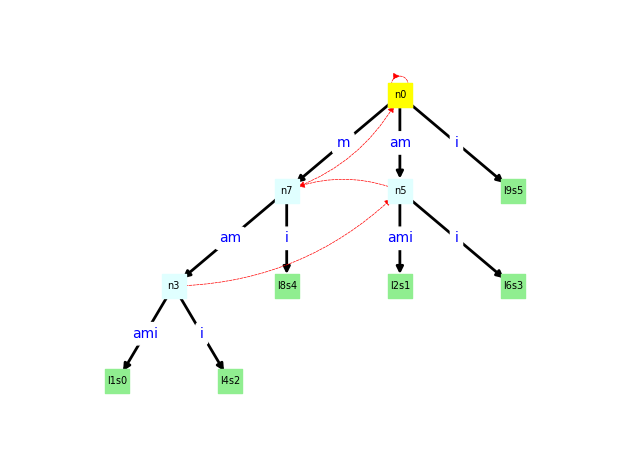

### Más rápido

Así, el algoritmo base tiene complejidad $O(m^3)$ y empeora las cosas a primera vista. Ahora trabajaremos para acelerar este proceso.

* En primer lugar, evitaremos aplicar la **Regla 1** que extiende las aristas de hoja agregándoles un carácter más. Internamente etiquetaremos las aristas de hoja con un límite superior especial $-1$ que actúa como marcador de posición para la posición $i$ en el árbol $T_i$. Considerar automáticamente el nuevo $i \leftarrow i+1$ cubre todas las posibles aplicaciones de la Regla 1 sin tener que visitarlas explícitamente.

* A continuación, podemos terminar una fase tan pronto como se cumpla la **Regla 3**. Supongamos que un camino para una cadena de la forma $\alpha c$ (donde $\alpha$ es una subcadena y $c$ un carácter) ya existe en el trie de sufijos hasta el momento; entonces ese camino **existirá** para todos los sufijos de $\alpha c$, y la fase puede terminar en el instante en que encontremos la Regla 3.

  * De hecho, la primera vez que topamos con la Regla 3 en una fase, podemos **parar** y recordar en qué ubicación del trie estábamos. En la fase siguiente, comenzaremos directamente desde esa dirección registrada en lugar de volver a la raíz.

Ya estamos listos para desarrollar el **algoritmo de Ukkonen**.

La idea principal es construir el trie en fases $T_0, T_1, \ldots, T_m$ como antes, pero optimizar la construcción de modo que el tiempo total sea $O(m)$ en todas las fases:

1. **Nunca** consideramos la Regla 1. Las aristas de hoja mantendrán implícitamente un índice `hi = -1` que denota el "final" de la subcadena hasta ahora. En cada fase, desplazamos implícitamente ese final un carácter hacia la derecha, sin necesidad de recorrer y extender explícitamente cada arista de hoja.

2. Terminamos cada fase tan pronto como se aplique la Regla 3 por primera vez. Para ello, almacenamos una **dirección** en el trie que indica dónde se produjo ese primer caso de Regla 3 en la fase anterior.

   * Al inicio del algoritmo, dicha dirección se inicializa apuntando a la raíz.

3. La **única** regla que puede requerir más de trabajo constante en cada fase es la **Regla 2**, que sucesivamente:

   * Partirá una arista en dos, creando un nuevo nodo interno y arista, o
   * Insertará una arista de hoja en un nodo interno ya existente.

A continuación ilustraremos el funcionamiento con la cadena `"BANANA$"`.

#### Fase 0

Insertamos el carácter `B` en el trie vacío. Se aplica la **Regla 2**. <img src="BANANA$.0.png" width="50%"></img>

Al final, la dirección sigue apuntando a la raíz.
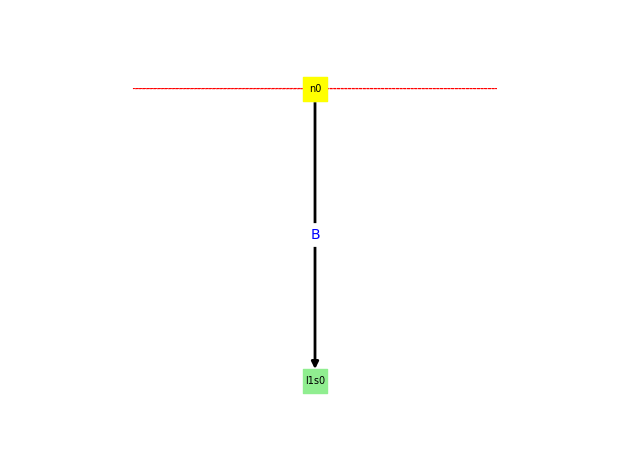

### Fase 1

Insertamos el carácter `A`. La extensión `B -> BA` se realiza implícitamente (Regla 1), añadiendo simplemente una arista de hoja etiquetada `A` en la raíz. 

<img src="BANANA$.1.png" width="50%"></img>

La dirección continúa apuntando a la raíz.
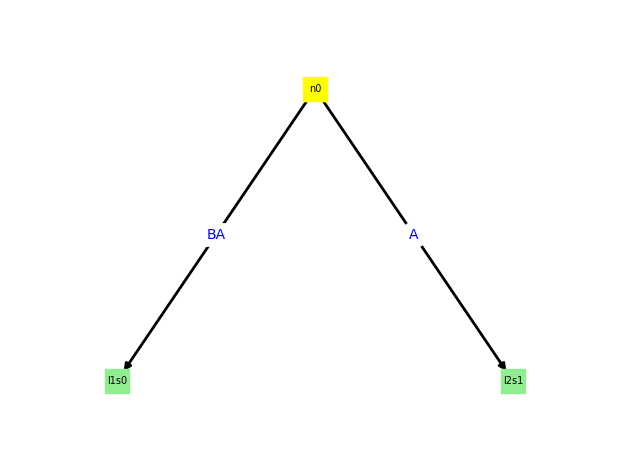

### Fase 2

Insertamos el carácter `N`. Las extensiones `BA -> BAN` y `A -> AN` también se hacen implícitamente. Solo se inserta `N` en la dirección actual (la raíz). La dirección sigue siendo la raíz.

<img src="BANANA$.2.png" width="50%"></img>
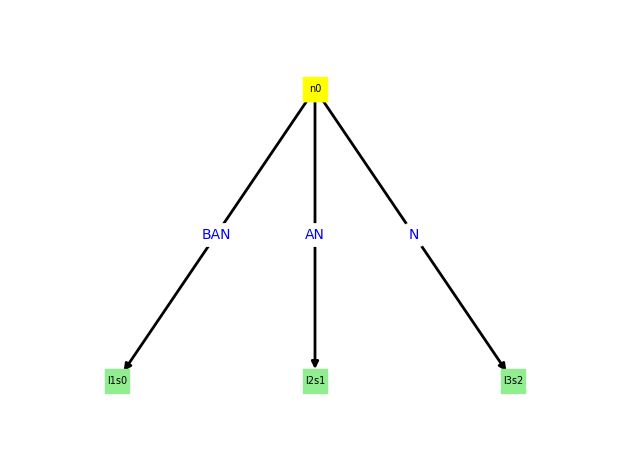

#### Fase 3

Ahora insertamos el carácter `A` al final. La dirección actual está en la raíz. Hay tres extensiones que implicarían la regla 1, pero estas no se consideran. Simplemente intentamos insertar el carácter `A` en la raíz, pero ya existe una arista etiquetada `AN`. Entonces observamos que se aplicaría la regla 3 y avanzamos una posición a lo largo de esa arista. La nueva dirección apunta a un desplazamiento de `1` en la arista `AN` saliente del nodo `n0`. La figura siguiente ilustra esto.


<img src="BANANA$.3.png" width="50%"></img>
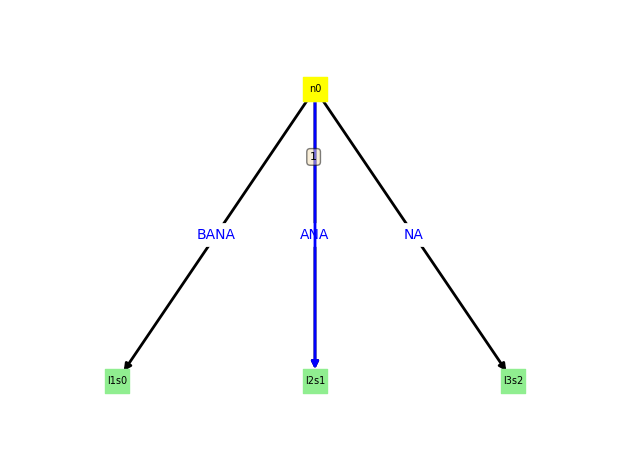

#### Fase 4

Ahora insertaremos el carácter `N` al final.
Como la fase anterior terminó aplicando la regla 3 en la dirección `(n0, n0 -> l2, 1)` del trie, simplemente intentamos insertar `N` en esa misma ubicación. Vemos que nuevamente se cumple la regla 3, así que actualizamos la dirección a `(n0, n0 -> l2, 2)` y detenemos la fase.

<img src="BANANA$.4.png" width="50%"></img>
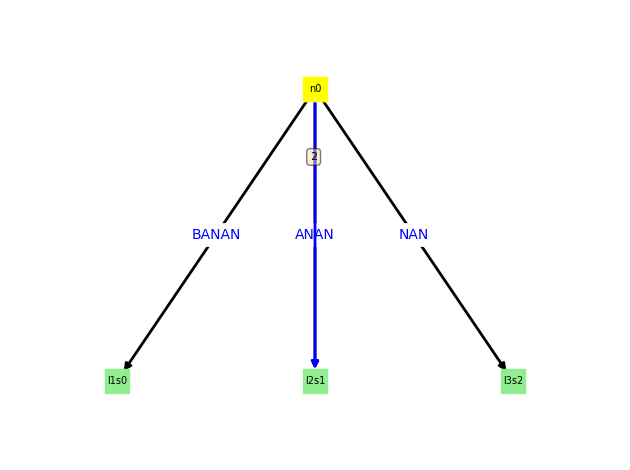

#### Fase 5

Insertaremos el carácter `A` al final. Dado que la fase anterior terminó aplicando la regla 3 en la dirección `(n0, n0 -> l2, 2)` del trie, simplemente intentamos insertar `A` en esa misma ubicación. Comprobamos que de nuevo se cumple la regla 3, por lo que actualizamos la dirección a `(n0, n0 -> l2, 3)` y detenemos la fase.

<img src="BANANA$.5.png" width="50%"></img>
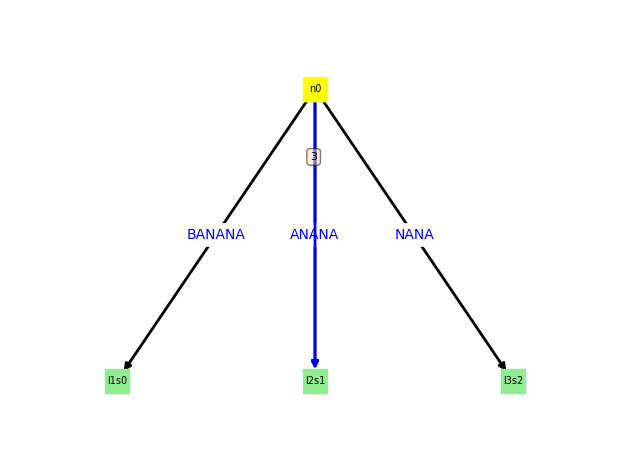

#### Fase 6

Intentaremos insertar el carácter `$` al final. La fase anterior terminó en `(n0, n0 -> l2, 3)`. Buscamos insertar `$` en esa ubicación, pero no existe tal carácter, así que se aplica la **Regla 2** y debemos partir la arista:

* Partimos la arista $n0 \rightarrow l2$ e insertamos un nuevo nodo interno $n4$ en ese punto.
* A continuación, seguimos el enlace de sufijo desde nuestra dirección actual e intentamos insertar `\$` allí:

  * El enlace de sufijo nos lleva a la arista $n0 \rightarrow l3$ con desplazamiento 2.
  * Insertamos `$` en ese lugar, lo que crea un nuevo nodo interno $n6$. Añadimos un enlace de sufijo de $n4$ a $n6$.
  * La dirección pasa a ser $(n0,\,n0 \rightarrow l3,\,2)$.
* Luego seguimos el enlace de sufijo desde esta nueva dirección e intentamos insertar `$` de nuevo:

  * El enlace de sufijo nos lleva a la arista $n0 \rightarrow n4$ con desplazamiento 1.
  * Insertamos `$` allí, creando un nuevo nodo interno $n8$.
  * Añadimos un enlace de sufijo de $n6$ a $n8$.
  * La dirección pasa a ser $(n0,0)$.
* Finalmente, añadimos un enlace de sufijo de $n8$ a la raíz y luego insertamos `$` en la raíz, dando lugar a una nueva hoja y su arista correspondiente.

<img src="BANANA$.6.png" width="50%"></img>

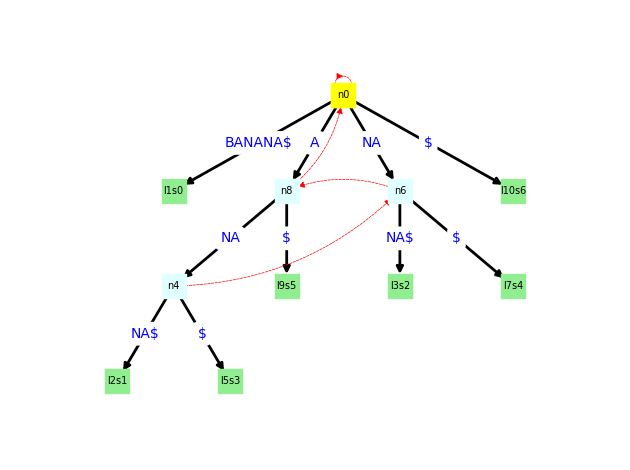

El código completo del algoritmo se muestra a continuación. Es un algoritmo complicado (ya que hay varios casos especiales que manejar). Con suerte, la descripción anterior te da una idea de su funcionamiento. Te animamos a leer detenidamente el código y sus comentarios.


In [ ]:
# Implementación del algoritmo de Ukkonen
def construct_suffix_trie(orig_str, debug=False):
    root = SuffixTrieNode(0, orig_str) # crea un nodo raíz con id = 0
    root.add_suffix_link(root) # hace que el enlace de sufijo de la raíz apunte a sí misma
    node_list= [root] # mantiene una lista de todos los nodos para nuestra contabilidad
    addr = TrieAddress(root, None, 0) # inicializa la dirección apuntando a la raíz
    n = len(orig_str)
    for i in range(n): # recorre cada posición de la cadena original
        # Ahora trabajaremos en la fase número i del algoritmo
        c = orig_str[i] 
        if debug:
            print(f"Fase # {i}: insertando {c}")
        node = None # inicializa punteros a node y new_node como None
        new_node = None # estos punteros nos ayudarán a añadir enlaces de sufijo para nodos nuevos más adelante
        dest = addr.traverse_next(c) # intenta moverse desde la dirección actual a una nueva dirección dado el carácter `c`.
        if dest != None:
            addr = dest # si existe destino, simplemente actualizamos addr a ese destino y continuamos
        else: # no existe tal destino. Se aplica la Regla #2 y debemos crear nuevos nodos internos
            while dest == None and not addr.is_at_root(): # mientras que la dirección actual no tenga destino para el carácter c y no esté en la raíz
                if debug:
                    print(f"Creando nuevo nodo con el char {orig_str[i]} en {addr}")
                # crea un nuevo nodo y una nueva hoja en la dirección actual
                (new_node, new_leaf, newly_created) = addr.create_new_edge_at(orig_str, i, len(node_list))
                if debug:
                    print(f"Creando un nuevo nodo: {new_node.id}")
                
                if node != None and not node.is_root():
                    node.add_suffix_link(new_node) # añade un enlace de sufijo desde el nodo previamente creado al nuevo nodo
                    if debug:
                        print(f"D1: Agregando enlaces sufijos :{node.id} ---> {new_node.id}")
                if newly_created:
                    node_list.append(new_node) # si se ha creado nuevo, añadirlo a la lista de nodos
                node_list.append(new_leaf)
                node = new_node # actualiza el puntero al nodo previamente creado
                addr = addr.compute_suffix() # calcula el sufijo de la dirección
                assert addr != None, f"Calculo de sufijos fallo. "
                dest = addr.traverse_next(c) # ve si hay un destino con el carácter c desde la nueva dirección calculada
                #if dest != None: # si hay destino
                #    new_node.add_suffix_link(addr.node) # añadir el último enlace de sufijo
                #    if debug:
                #        print(f"D2: Adding Suffix Link: {new_node.id} --> {addr.node.id}")
            # Salimos del bucle
            # añade un enlace de sufijo desde el último nodo creado hasta la dirección actual
            if node != None:
                if debug:
                    print(f"D3: Agregando enlace sufijos: {new_node.id} --> {addr.node.id}")
                node.add_suffix_link(addr.node)
            
            if dest == None:
                # si esto ocurre, estamos en la raíz
                # inserta el carácter `c` aquí
                assert addr.is_at_root()
                (new_node, new_leaf, newly_created) = addr.create_new_edge_at(orig_str, i, len(node_list))
                assert not newly_created 
                node_list.append(new_leaf)
            else:
                # esto indica que el carácter c ya existe
                addr = dest
        
        if debug:
            print("actualmente en: ", addr)
            draw_networkx_graph(root, end=i+1, highlight_addr=addr, filename=f"{orig_str}.{i}.png")
    return root


Observemos brevemente que el algoritmo se ejecuta en tiempo lineal, aunque no resulte evidente a primera vista por qué. Claramente, en cada fase el algoritmo simplemente actualiza su dirección actual (aplicando la regla 3) en tiempo $O(1)$ o pasa a una serie de aplicaciones de la regla 2. Sin embargo, el hecho clave que puede demostrarse es que el número de aplicaciones de la regla 2 no puede exceder el número de aplicaciones previas de la regla 3. Por lo tanto, podemos "cargar" cada aplicación de la regla 3 para sufragar el coste de una futura aplicación de la regla 2.

A continuación, demostraremos su funcionamiento con algunos ejemplos.


In [ ]:
def test_suffix_trie(root, orig_str):
    # probar si construimos correctamente el trie de sufijos
    n = len(orig_str)
    for i in range(n):
        addr = TrieAddress(root, None, 0)
        for c in orig_str[i:]:
            addr0 = addr
            addr = addr.traverse_next(c)
            assert addr != None, f"{orig_str[i:]}: Se esperaba un siguiente nodo para el carácter {c} desde la dirección {addr0}, pero se obtuvo None"
        assert addr.edge != None, f"{orig_str[i:]}: Se terminó en la dirección {addr}, que no tiene arista, pero se esperaba una arista hoja"
        assert addr.edge.is_leaf_edge(), f"No se terminó en una arista hoja para {orig_str[i:]}"
        assert addr.edge.dest.suffix_start_pos == i, f"La posición inicial del sufijo {orig_str[i:]} debería ser {i}, pero se obtuvo {addr.edge.dest.suffix_start_pos}"


In [ ]:
def check_suffix_links(root):
    worklist = [root]
    all_nodes = [root]
    d = {0:""}
    while len(worklist) > 0:
        n = worklist.pop()
        str_n = d[n.id]
        for (_, e) in n.outgoing_edges.items():
            if not e.is_leaf_edge():
                str_e = str_n + e.orig_str[e.lo:e.hi+1]
                d[e.dest.id] = str_e
                worklist.append(e.dest)
                all_nodes.append(e.dest)
    for n in all_nodes:
        assert n.suffix_link != None, f'el nodo {n.id} no tiene enlace de sufijo'
        s_n = n.suffix_link
        assert n.id in d
        assert s_n.id in d
        s1 = d[n.id]
        s2 = d[s_n.id]
        assert s1[1:] == s2, f'el nodo {n.id} tiene la cadena {s1} pero su nodo de sufijo tiene la cadena {s2}'
    print("¡Todos los enlaces de sufijo son válidos!")


In [ ]:

root = construct_suffix_trie("BANANA$", debug=True)
test_suffix_trie(root, "BANANA$")
check_suffix_links(root)
draw_networkx_graph(root)

In [ ]:

root = construct_suffix_trie("ACCACAAC$", debug=True)
test_suffix_trie(root, "ACCACAAC$")
check_suffix_links(root)
draw_networkx_graph(root)

In [ ]:
root = construct_suffix_trie("CCTCCG$", debug=True)
test_suffix_trie(root, "CCTCCG$")
draw_networkx_graph(root)

In [ ]:
orig_str = "mamamia$"
root = construct_suffix_trie(orig_str, debug=True)
draw_networkx_graph(root, filename="mamamia-suffix-trie.png")
test_suffix_trie(root, orig_str)

In [ ]:
root = construct_suffix_trie("abacus$")
draw_networkx_graph(root)
test_suffix_trie(root, "abacus$")
check_suffix_links(root)

In [ ]:
root = construct_suffix_trie("papaya$")
draw_networkx_graph(root)
test_suffix_trie(root, "papaya$")
check_suffix_links(root)

In [ ]:
root = construct_suffix_trie("aaaamy$")
draw_networkx_graph(root)
test_suffix_trie(root, "aaaamy$")
check_suffix_links(root)

In [ ]:
root = construct_suffix_trie("queqquequ$", debug=False)
draw_networkx_graph(root)
test_suffix_trie(root, "queqquequ$")
check_suffix_links(root)

In [ ]:
root = construct_suffix_trie("catama$", debug=False)
draw_networkx_graph(root)
test_suffix_trie(root, "catama$")
check_suffix_links(root)

In [ ]:
root = construct_suffix_trie("TGGT$", debug=False)
draw_networkx_graph(root)
test_suffix_trie(root, "TGGT$")
check_suffix_links(root)

In [ ]:
root = construct_suffix_trie("AAAACCCAAAACCCTTTTAA$", debug=False)
draw_networkx_graph(root)
test_suffix_trie(root, "AAAACCCAAAACCCTTTTAA$")
check_suffix_links(root)

In [ ]:
from random import choice

def generate_random_str_and_test(l, debug=True):
    chars = ['A', 'C', 'T', 'G']
    s = []
    for i in range(l):
        s.append(choice(chars))
    s.append('$')
    orig_str = "".join(s)
    print(f"generando el trie de sufijos para {orig_str}")
    root = construct_suffix_trie(orig_str, debug)
    #draw_networkx_graph(root)
    test_suffix_trie(root, orig_str)
    check_suffix_links(root)
    print('\t Las pruebas pasaron!')
    

In [ ]:
import inspect
print(inspect.getsource(generate_random_str_and_test))


In [ ]:
for i in range(10000):
    generate_random_str_and_test(50, debug=False)

#### Validación de tiempo empírica

In [ ]:
from time import process_time

def generate_random_str_and_time(l, n_samples=1000):
    chars = ['A', 'C', 'T', 'G']
    tot_time = 0
    for _ in range(n_samples):
        s = []
        for i in range(l):
            s.append(choice(chars))
        s.append('$')
        orig_str = "".join(s)
        t0 = process_time()
        root = construct_suffix_trie(orig_str, debug=False)
        t1 = process_time()
        tot_time = tot_time + (t1 - t0)
    print(f'longitud: {l} --> tiempo para {n_samples} ejecucion: {tot_time}')
    return tot_time/n_samples
    

In [ ]:
from matplotlib import pyplot as plt
lengths = [10, 15, 20, 25, 50, 100, 200, 500, 1000, 2500, 5000]
times = [generate_random_str_and_time(l) for l in lengths]
plt.plot(lengths, times, '-x')
plt.xlabel('Longitud de cadena')
plt.ylabel('Tiempo de ejecucion(segundos)')
plt.show()

### **Aplicaciones de los Tries de Sufijos**

Ya hemos mencionado una aplicación sencilla de los tries de sufijos al emparejamiento de patrones. Dada una cadena grande $s$, podemos preprocesarla para construir su trie de sufijos.

#### Búsqueda de ocurrencias de patrones

Cuando consultamos el trie de sufijos con una cadena patrón más corta $t$, podemos responder rápidamente a las siguientes preguntas en tiempo proporcional a la longitud del patrón $t$:

* ¿Aparece $t$ como subcadena en $s$?
* ¿Cuál es el prefijo más largo de $t$ que aparece como subcadena en $s$?
* ¿Cuántas veces aparece $t$ como subcadena de $s$?
* Lista las posiciones de inicio de todas las ocurrencias de $t$ en $s$ (ten en cuenta que esto tomará tiempo $O(|t| + k)$, donde $k$ es el número de ocurrencias de $t$ en $s$).

También podemos extender esto a patrones con comodines (wild-cards) que pueden representar cualquier carácter.


In [ ]:
def find_all_occurrences(root, pattern):
    addr = TrieAddress(root) # comienza en la raíz
    n = len(pattern)
    for i in range(n): # recorrer el trie de acuerdo a los caracteres sucesivos del patrón
        addr = addr.traverse_next(pattern[i])
        if addr == None:
            print(f'{pattern} no aparece en la cadena. El prefijo más largo que sí aparece es {pattern[:i]}')
            return [] # devolver lista vacía
    # si llegamos aquí, entonces addr no puede ser nulo
    assert addr != None
    # ahora recolecta todas las hojas alcanzables desde la dirección y obtiene sus campos de posición inicial del sufijo
    start_positions = []
    list_of_nodes = []
    if addr.edge == None:
        list_of_nodes.append(addr.node)
    else:
        list_of_nodes.append(addr.edge.dest)
    while len(list_of_nodes) > 0:
        # sacar un nodo de la lista
        node = list_of_nodes.pop()
        if node.is_leaf(): # si es una hoja, agrega la posición inicial del sufijo correspondiente a esta hoja
            start_positions.append(node.suffix_start_pos)
        else:
            # de lo contrario, obtiene todos los nodos hijos
            for (_, edge) in node.outgoing_edges.items():
                list_of_nodes.append(edge.dest) # agregarlos a la lista de nodos no procesados
    return start_positions # devuelve todas las posiciones de inicio


In [ ]:
orig_str = "ACCTAGCCTGATTACAAATGCGCGTTGTTGATTACAATTACCTAGC$"
root = construct_suffix_trie(orig_str, debug=False)
draw_networkx_graph(root)
test_suffix_trie(root, orig_str)

In [ ]:
find_all_occurrences(root, "GATTACA")

In [ ]:
find_all_occurrences(root, "CAATT")

In [ ]:
find_all_occurrences(root, "ATT")

In [ ]:
find_all_occurrences(root, "AT")

#### Subcadena común más larga

Consideremos dos cadenas $s$ y $t$. Deseamos encontrar la cadena más larga $p$ tal que $p$ sea una subcadena de ambas, $s$ y $t$. Nótese que esto es diferente del problema de la subsecuencia común más larga estudiado anteriormente sobre programación dinámica. Aquí $p$ debe aparecer en posiciones contiguas en $s$ y en $t$.

Por ejemplo, consideremos $s = banana\$$ y $t = bnanabna\$$. La subcadena común más larga es "nana".

La idea es construir un trie de sufijos para la cadena $s$. A continuación, recorremos ese trie de sufijos siguiendo la cadena $t$, con un índice $i$ que parte de 0 y recorre las posiciones de $t$.

En cada paso \$i\$, mantenemos la dirección actual que representa el sufijo más largo de $t[0], \dots, t[i-1]$ que es subcadena de $s$. Para el paso $i+1$, intentamos ver si podemos extender la dirección actual con $t[i]$. Si no es posible, seguimos los enlaces de sufijo hasta alcanzar un nodo donde sí podamos añadir $t[i]$. Si no existe tal punto, volvemos al nodo raíz.

A medida que el proceso avanza, guardamos el nodo de mayor profundidad alcanzado hasta el momento en el trie de sufijos. Ese nodo corresponde precisamente a la subcadena común más larga entre $t[0], \dots, t[i-1]$ y $s$. Cuando el proceso termina, recuperamos la subcadena asociada y la devolvemos.

El algoritmo funciona en tiempo $O(|s| + |t|)$ si utilizamos un método de construcción del trie de sufijos lineal en el tamaño de la cadena.


In [ ]:
def find_longest_common_substring(s, t):
    n = len(t)
    root = construct_suffix_trie(s, debug=False)
    addr = TrieAddress(root) # comienza con la dirección siendo la raíz
    best_depth = 0
    best_addr = addr 
    # recorre cada índice de t
    for i in range(n): 
        c = t[i] 
        addr1 = addr.traverse_next(c) # intentar extender la dirección actual con c
        while addr1 == None and not addr.is_at_root(): # mientras sigamos fallando o no estemos en la raíz
            addr = addr.compute_suffix() # calcular la dirección del sufijo
            addr1 = addr.traverse_next(c) # ver si el sufijo puede extenderse
        if addr1 != None: 
            addr = addr1
        addr_depth = addr.compute_depth() # consulta la profundidad de la dirección actual
        if addr_depth > best_depth: # si es mayor que la mejor encontrada hasta ahora
            best_depth = addr_depth # actualiza la mejor hasta ahora
            best_addr = addr 
    
    # ahora calcula la subcadena común recorriendo hacia atrás desde la mejor dirección hasta la raíz
    common_substring = ""
    if best_addr.edge != None: # si estamos en medio de una arista, agrega la subcadena y avanza al nodo interno
        lo_idx = best_addr.edge.lo
        offs = best_addr.offs
        common_substring = s[lo_idx:lo_idx+offs]
    cur_node = best_addr.node
    while cur_node.parent != None: # sigue recorriendo el puntero al padre hasta llegar a la raíz
        parent_node = cur_node.parent
        parent_edge = parent_node.find_edge_corresponding_to_child(cur_node)
        assert parent_edge != None
        assert not parent_edge.is_leaf_edge()
        # agrega la subcadena relevante de cada arista recorrida a la subcadena común
        common_substring = s[parent_edge.lo:parent_edge.hi+1] + common_substring
        cur_node = parent_node 
    return common_substring


In [ ]:
find_longest_common_substring("banananaxnanana$", "bnananaxbnanana$")

In [ ]:
find_longest_common_substring("TTATTGAGGATTACATT$", "ACTGGATTACATA$")

#### **Ejercicios**


1. **Construcción incremental del suffix trie**

   * Partiendo de la clase `TrieAddress`, implementa la función `construct_suffix_trie(orig_str: str) -> SuffixTrieNode` usando el algoritmo de Ukkonen.
   * Cada fase debe añadir un carácter más de `orig_str` y actualizar los `suffix_link` de los nodos.
   * **Entrega**: código documentado y script de prueba con cadenas como `"banana$"` y `"abracadabra$"`.

2. **Búsqueda de substrings**

   * Implementa `find_all_occurrences(pattern: str) -> List[int]` que, usando tu suffix trie, recoja todas las posiciones de inicio de `pattern` en `orig_str`.
   * Debe recorrer el trie con `TrieAddress.traverse_next` y, al completar el patrón, recolectar las hojas del subárbol.
   * Comprueba que tus resultados coinciden con múltiples llamadas a `str.find()`.

3. **Longest Common Substring de dos cadenas**

   * Construye el suffix trie de `s + '#' + t + '$'`.
   * Marca cada hoja según provenga de `s` o de `t` usando `suffix_start_pos`.
   * Recorre el trie (DFS) para identificar los nodos cuyos subárboles contengan hojas de ambas cadenas y devuelve la cadena de mayor profundidad.

4. **Mutación dinámica y rollback**

   * Extiende tu implementación para soportar borrado de la última fase (undo) y rollback completo.
   * Cada inserción debe dejar un registro (split de aristas, nodos creados) que permita revertirla y restaurar `suffix_link` correctamente.

5. **Implementación básica de Radix Trie**

   * Crea clases `RadixNode` y `RadixEdge` donde cada arista almacene una subcadena en lugar de un solo carácter.
   * Implementa métodos:

     * `insert(key: str)`
     * `search(key: str) -> bool`
     * `starts_with(prefix: str) -> List[str]`
   * Al insertar, divide la arista cuando solo haya prefijo parcial en común.
   * **Validación**: carga un diccionario de ~10 000 palabras y compara número de nodos y tiempos de búsqueda frente a un trie carácter a carácter.

6. **Soporte de eliminación**

   * Añade `delete(key: str)` que borre una clave de la radix trie.
   * Tras borrar, fusiona aristas adyacentes cuando sea posible y elimina nodos sin claves en su subárbol.

7. **Conteo de prefijos**

   * Implementa `count_with_prefix(prefix: str) -> int`.
   * Cada nodo debe llevar un contador de cuántas palabras pasan por él, actualizado en inserciones y borrados.

8. **Balanceo y análisis de memoria**

   * Compara uso de memoria y rendimiento entre tu trie carácter-a-carácter y la radix trie usando un corpus grande (p. ej. Project Gutenberg).
   * Mide:

     * Número total de nodos y tamaño de cadenas en aristas.
     * Tiempos de inserción y búsqueda de 100 000 palabras aleatorias.

9. **Conversión automática**: dado un trie normal, escribe un método que lo comprima automáticamente en un radix trie.
10.  **Patricia Trie con hashing**: usa hashes de subcadenas para comparar en lugar de carácter a carácter.
11. **Búsqueda aproximada**: adapta tu suffix trie para buscar patrones con distancia de edición $\leq 1$ usando backtracking sobre enlaces de sufijo.


12. **Construcción de Suffix Tree comprimido**

   * Partiendo de tu `construct_suffix_trie`, modifica el código para que genere un **suffix tree** (trie comprimido), agrupando aristas contiguas siempre que no haya bifurcación.

13. **Extracción de Suffix Array y LCP**

   * A partir del árbol de sufijos, recorrelo en orden lexicográfico para producir el **suffix array**.
   * Implementa además el cálculo del **LCP array** usando los `suffix_link` y las profundidades de los nodos.

14. **Búsqueda de patrón en tiempo óptimo**

   * Crea una función `contains(pattern: str) -> bool` que recorra el árbol comprimido en O(m) (m = longitud del patrón) para determinar si existe el patrón en la cadena original.

15. **Listar todas las ocurrencias de un patrón**

   * Extiende `contains` para que, tras llegar al nodo/offset final, recoja todas las posiciones de sufijos en su subárbol y devuelva la lista de índices de inicio.

16. **Cálculo de las k-subcadenas más frecuentes**

   * Usa el árbol de sufijos para contar la frecuencia de cada subcadena de longitud k.
   * Devuelve las k-subcadenas más comunes, junto con su número de apariciones.

17. **Patrón con errores (edit distance $\leq 1$)**

   * Implementa un recorrido con backtracking que, partiendo de la raíz, permita hasta un error (inserción, borrado o sustitución) al buscar un patrón, devolviendo las posiciones aproximadas.

18. **Soporte de streaming (online)**

   * Refactoriza la construcción para procesar la cadena carácter a carácter a medida que llega (sin conocer la longitud total de antemano), manteniendo el árbol actualizado.

19. **Rollback de fases**

   * Diseña un mecanismo para **deshacer** la última fase de Ukkonen (revertir inserción y enlaces de sufijo), de modo que puedas "retroceder" i-1 -> i–2 fases.

20. **Medición de rendimiento y profiling**

   * Agrega hooks o decoradores para medir tiempos internos de cada fase y de cada operación de split.
   * Genera un reporte tabulado (por ejemplo, con `pandas`) que muestre distribución de tiempos por fase.

21. **Visualización incremental**

    * Integra tu `draw_networkx_graph` para que, en cada fase, genere y guarde la imagen del árbol, y luego genere un pequeño GIF que lo anime.

22. **Conversión a Suffix Automaton**

    * A partir de tu suffix trie, implementa el algoritmo de construcción de un **suffix automaton** y comprueba que reconoce las mismas subcadenas.

23. **Compresión de memoria**

    * Reemplaza la cadena completa `orig_str` en cada nodo/edge por **punteros a slices** de un buffer compartido, reduciendo el uso de memoria.

24. **Integración con Suffix Array externo**

    * Combina tu árbol con un método de construcción de suffix array (p. ej. SA-IS) para verificación cruzada de resultados y benchmarks.

25. **Implementación en paralelo**

    * Prueba una estrategia de paralelizar fases independientes (por ejemplo, fase i vs i+k) usando `concurrent.futures` y compara rendimientos.

26. **Extensión a múltiples alfabetos**

    * Adapta tu estructura para manejar cadenas sobre alfabetos genéricos (por ejemplo, emoji o secuencias UTF-8) y valida que siga funcionando correctamente.



In [ ]:
## Respuestas